# Practical Application III: Comparing Classifiers

#### Business Understanding
The goal of this project was to predict whether a client would subscribe to a term deposit based on their personal and campaign-related features. This insight allows the bank to target high-potential clients and optimize marketing campaigns.

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data
How many marketing campaigns does this data represent?

- The dataset contains 4119 rows and 20 features. These include client demographic data, bank interaction history, and social/economic context attributes. The target variable is y, indicating whether a client subscribed to a term deposit

The Bank Marketing dataset represents a single marketing campaign. The dataset includes information on various client attributes and details of marketing efforts, such as the number of contacts made during the campaign and the outcomes of previous campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [111]:
bank_full = pd.read_csv('bank-additional-full.csv', sep=';')
bank_data= pd.read_csv('bank-additional.csv', sep=';')

In [112]:
bank_full.head()
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



•	Some features, including job, marital, education, default, housing, and loan, contain an 'unknown' category, which might represent missing or incomplete data.

In [113]:
#Check for missing values
print("Missing values in each feature:")
print(bank_data.isnull().sum())

Missing values in each feature:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


The output shows that there are no missing values, However, based on the data description, features like job, marital, education, default, housing, and loan might have unknown values, which could indicate missing or incomplete data.

In [114]:
# 'unknown' in each feature
unknown_counts = (bank_data == 'unknown').sum()
print(unknown_counts)

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64


In [115]:
# Replace 'unknown' with NaN for all columns
bank_data.replace('unknown', pd.NA, inplace=True)

# Verify the replacement
print(bank_data.isnull().sum())

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64


In [116]:
# Impute categorical features with mode
categorical_features_to_impute = ['job', 'marital', 'education', 'housing', 'loan']
for feature in categorical_features_to_impute:
    bank_data[feature].fillna(bank_data[feature].mode()[0], inplace=True)

# Impute 'default' with 'no'
bank_data['default'].fillna('no', inplace=True)

# Verify missing values are handled
print(bank_data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


•	The dataset includes numeric and categorical features. However, categorical features (job, marital, contact) appear as strings and need to be converted into categorical data types for modeling.

• Missing values in columns such as job, marital, education, housing, and loan were replaced with the most frequent value (mode) of each respective column. This approach 
ensures minimal disruption to the dataset while maintaining the integrity of the features.

• Missing values in the default column were filled with "no", as the majority of clients do not have credit in default.

In [11]:
# Convert categorical features to 'category' data type
categorical_features = ['job', 'marital', 'education', 'default', 
                        'housing', 'loan', 'contact', 'month', 
                        'day_of_week', 'poutcome', 'y']
bank_data[categorical_features] = bank_data[categorical_features].astype('category')

# Verify data types
print("Data types after conversion:")
print(bank_data.dtypes)

Data types after conversion:
age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object


•	The duration feature, while impactful on the target variable (y), is unrealistic for predictive modeling since it represents post call data. This feature will be excluded during modeling.

• Columns like job, marital, and contact were initially strings and were converted into the "category" data type for more efficient processing during modeling.

In [13]:
#Drop 'duration'
bank_data.drop(columns=['duration'], inplace=True)

•	The pdays feature includes a value of 999 indicating no prior contact. This can be converted into a binary feature (contacted previously: yes/no).

In [14]:
#Transform 'pdays' into binary feature
bank_data['previous_contact'] = (bank_data['pdays'] != 999).astype(int)
bank_data.drop(columns=['pdays'], inplace=True)

In [15]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'previous_contact'],
      dtype='object')


• The most common job categories are 'admin.', 'blue-collar,' and 'technician,' while categories like 'student' and 'unknown' have very few observations. This insight highlights potential imbalances in the job feature

**Now, for some readability organize the plot on group features by type: Categorical features and numeric feature**

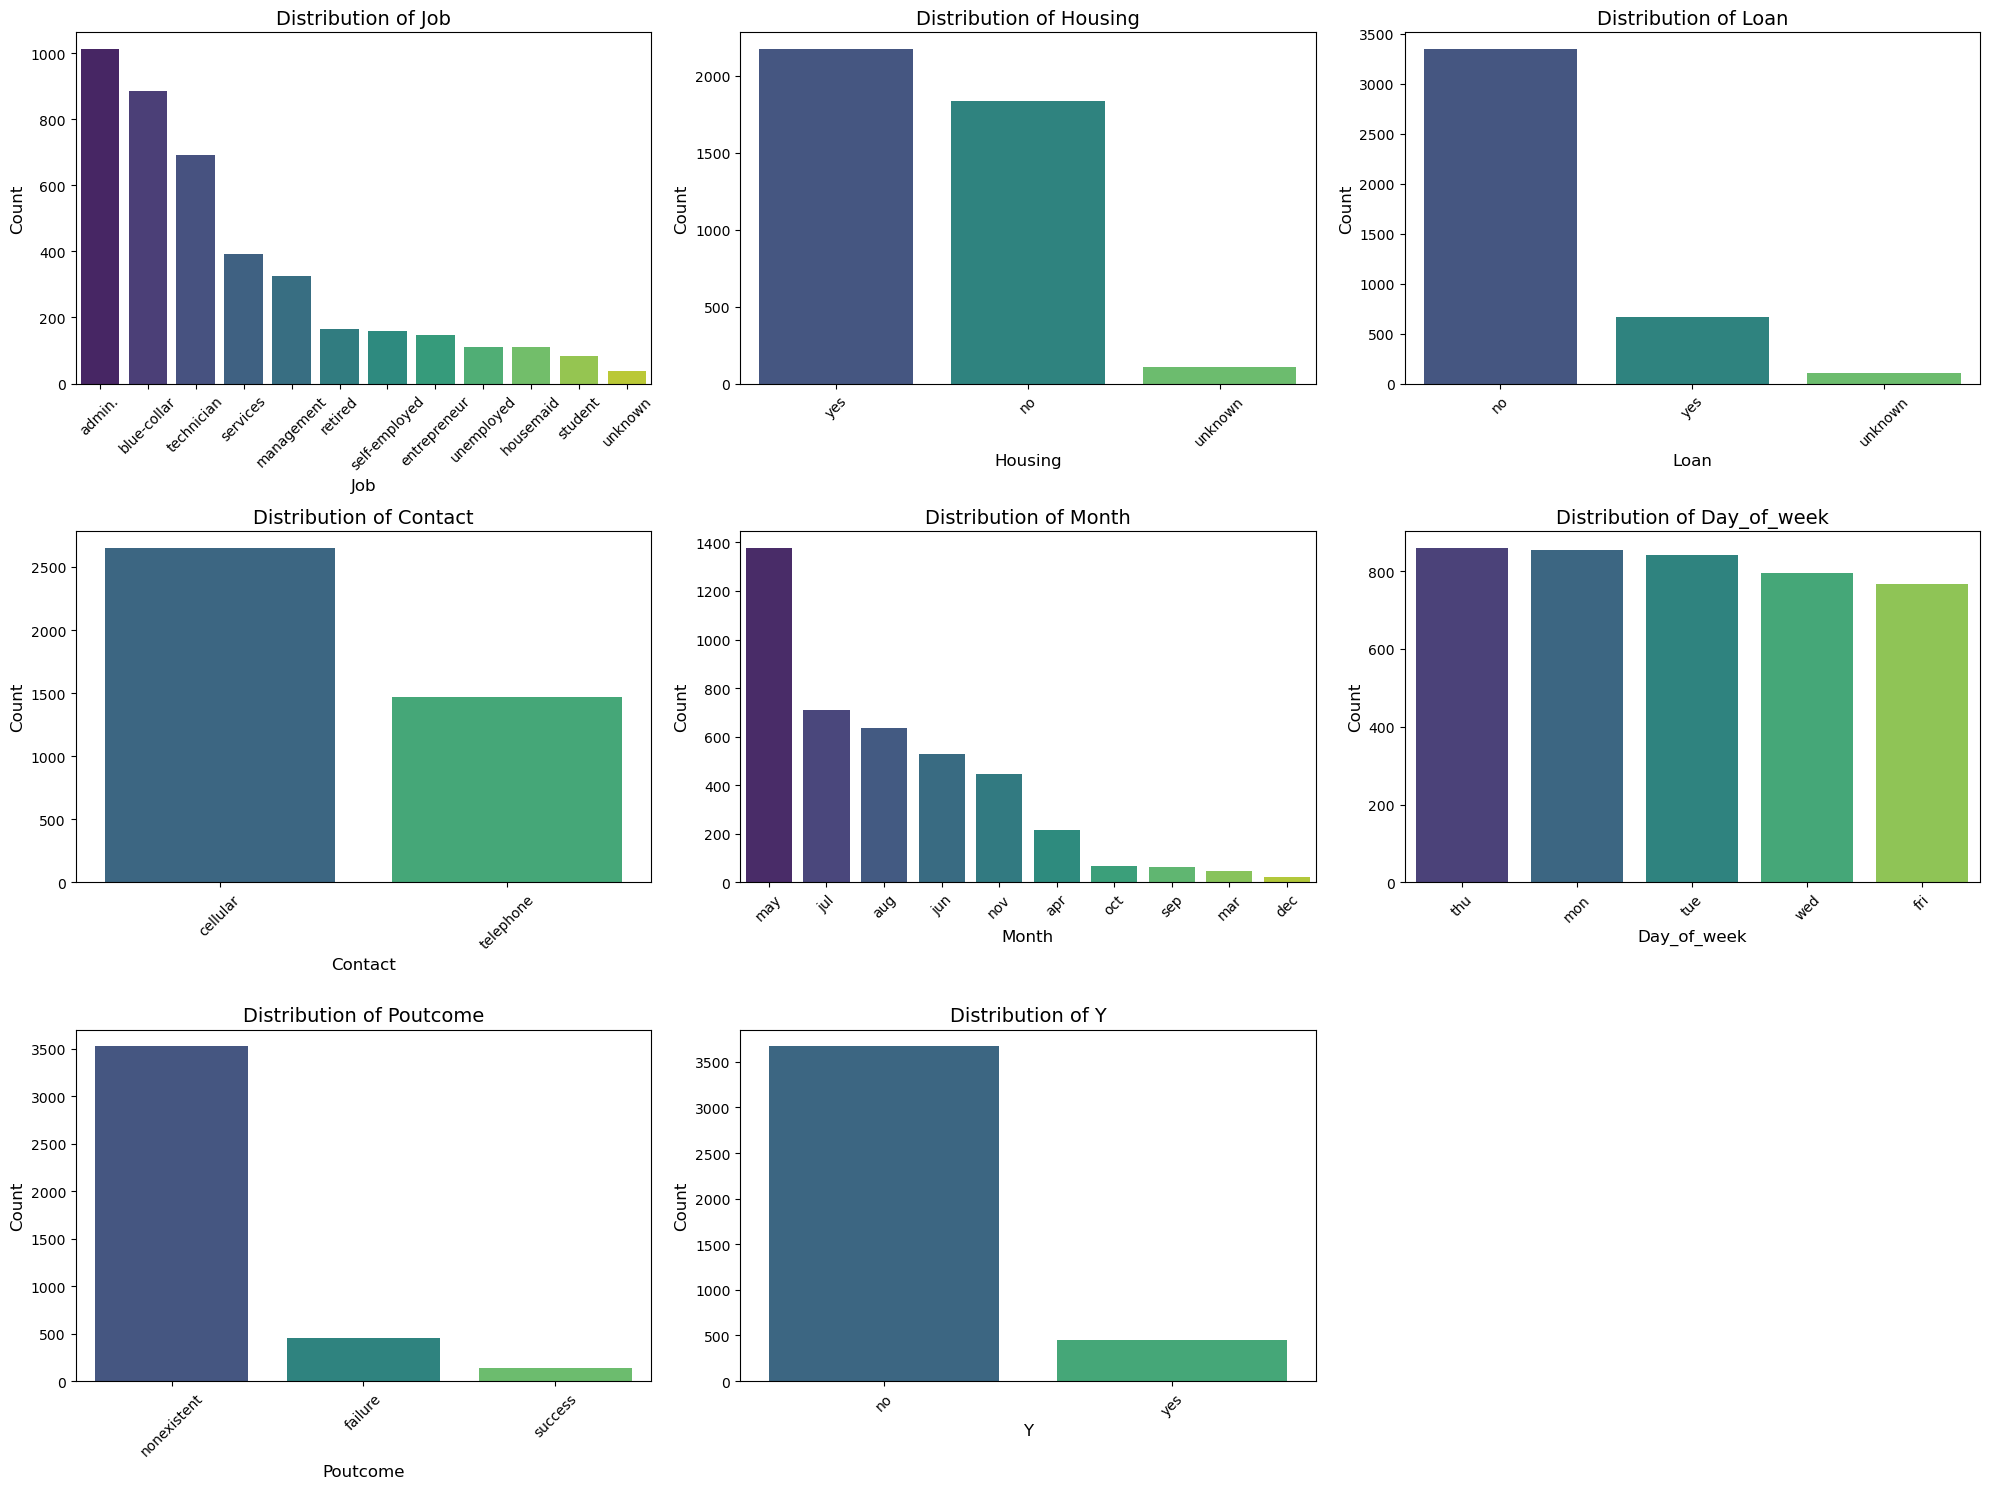

In [87]:
categorical_features = ['job','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Subplots for categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)  # Adjust rows and columns for readability
    sns.countplot(data=bank_data, x=feature, palette='viridis', order=bank_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=14)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- The largest segment of clients work in the admin. category, followed by blue-collar and technician roles. These three categories make up the majority of the dataset, **suggesting that marketing campaigns might primarily target individuals in these profession**

- The majority of clients have a housing loan
- A significant proportion do not have a housing loan
**This feature could influence the likelihood of term deposit subscriptions. Those with housing loans might be less likely to subscribe due to financial commitments.**
  
- Most clients do not have a personal loan, while fewer have one (yes)

- The majority of client contacts were made via cellular, with fewer made via telephone.
**The communication channel might affect response rates. For instance, cellular contacts may lead to higher success rates due to convenience.**

- Most marketing efforts occurred in May, followed by July and August. Other months have significantly lower counts.
**This could indicate seasonal patterns in marketing campaigns. High activity in May may align with specific financial events or opportunities.**

- Contact volumes are fairly evenly distributed across the workweek, with slight variations.
**Day of contact may not be a significant factor, but it’s worth including in the model to test its importance.**

- Most clients fall into the nonexistent category, indicating no prior campaigns.

- Among those who participated in previous campaigns, failure is more common than success.**This feature could be highly predictive. A success in previous campaigns might indicate a higher likelihood of subscription in the current campaign.**

- On the target variable the dataset is imbalanced, with far more clients declining term deposits (no) than subscribing (yes).
**This imbalance must be addressed during modeling to ensure fair predictions. Techniques such as oversampling, undersampling, or weighted metrics may be necessary.**

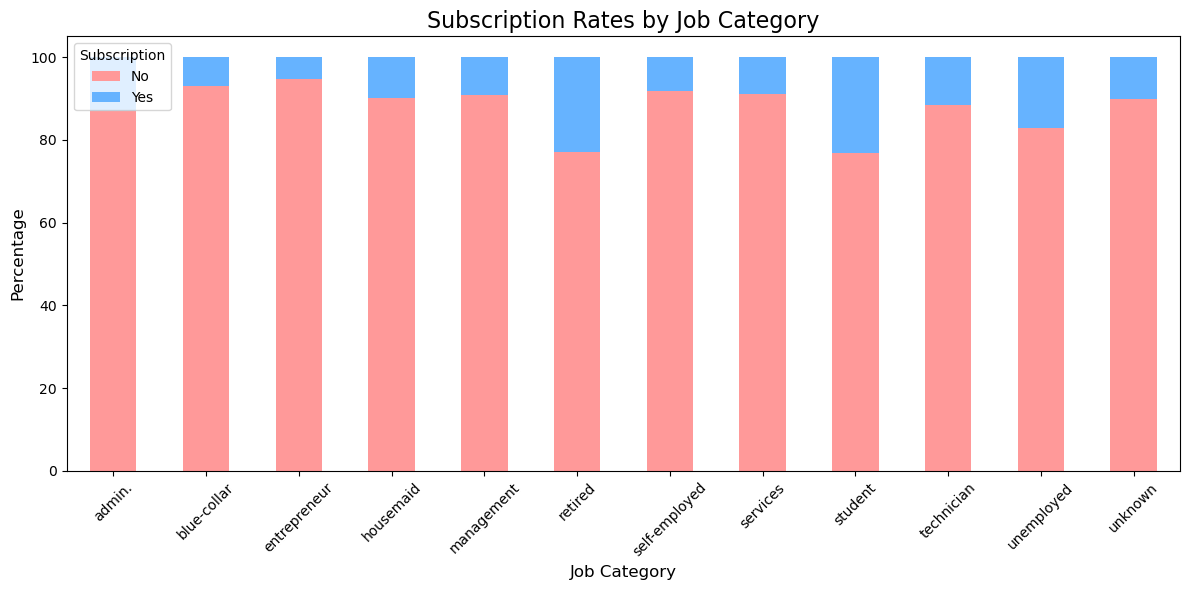

In [95]:
# Calculate subscription rates for each job category
job_subscription_rate = (
    bank_data.groupby(['job', 'y']).size()  # Get the counts
    .unstack(fill_value=0)  # Pivot the 'yes' and 'no' subscriptions into separate columns
)

# Normalize to get percentages
job_subscription_rate = job_subscription_rate.div(job_subscription_rate.sum(axis=1), axis=0) * 100

# Plot the subscription rates by job
job_subscription_rate.plot(
    kind='bar',
    figsize=(12, 6),
    stacked=True,
    color=['#ff9999', '#66b3ff']
)

# Add plot titles and labels
plt.title('Subscription Rates by Job Category', fontsize=16)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(['No', 'Yes'], title='Subscription', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

Marketing efforts could focus on job categories with higher subscription potential (e.g., retired, management). Categories with low subscription rates might require tailored campaigns or could be deprioritized for efficiency.

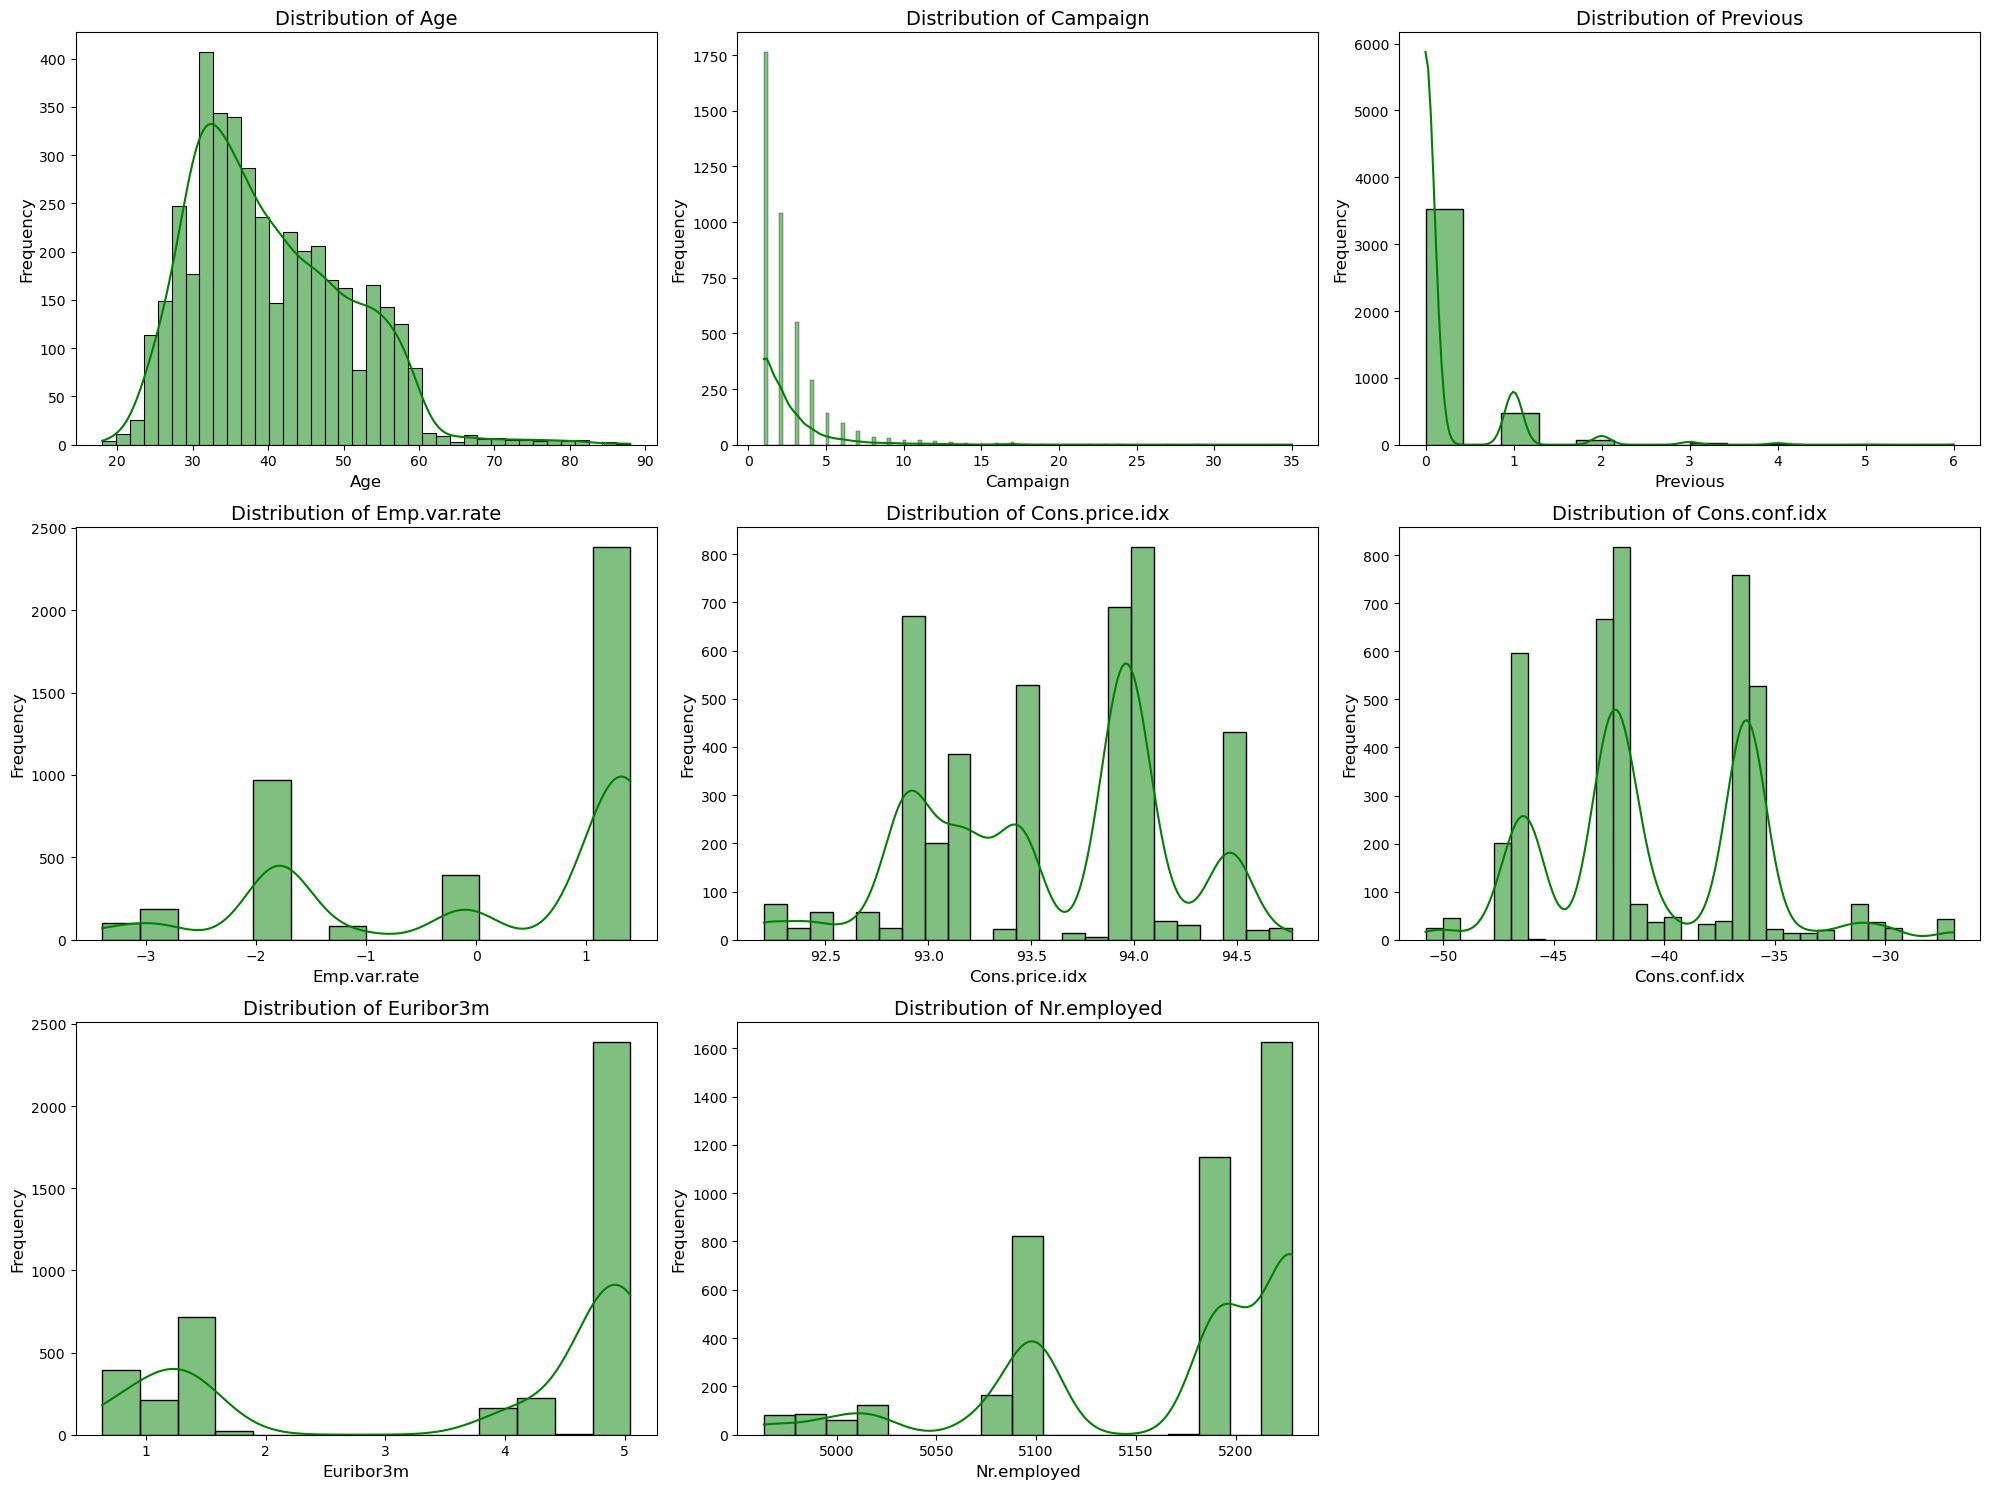

In [86]:
numeric_features = ['age','campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Subplots for numeric features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=bank_data, x=feature, kde=True, color='green')
    plt.title(f'Distribution of {feature.capitalize()}', fontsize=14)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**Distribution of Age**:The majority of clients are between 30 and 50 years old, with a peak around 30–35 years.
Few clients are above 60 or below 20, indicating that marketing efforts are likely targeted at working-age individuals.
This skewness suggests that age might not follow a normal distribution, and some transformations might improve model performance.Older clients (e.g., 50+) may exhibit different subscription patterns, warranting further analysis (as seen in the age group plot).

**Distribution of Campaign:**  Most clients were contacted fewer than 5 times during the campaign, which could indicate focused marketing efforts.

**Distribution of Previous:** Most clients had no prior contact (previous = 0), while a small proportion were contacted up to 6 times in previous campaigns.This feature may have strong predictive power, especially for previous > 0.

**Distribution of Emp.var.rate:**
[Bimodal]: Peaks at -1.8 and 1.1, representing economic conditions during the campaign period. Economic variation rate is likely linked to broader macroeconomic trends. This could affect customer behavior and campaign outcones.

**Distribution of Cons.price:**
Consumer price index has distinct peaks around 93.5 and 94.0. Indicates fluctuating price indices during the data collection period. It might correlate with the willingness of clients to invest.

**Distribution of Cons.conf:** Most values cluster between -36 and -42, reflecting consumer confidence during the campaign period. Low confidence values may indicate an economic downturn, potentially influencing the likelihood of term deposit subscription.

**Distribution of Euribor3m:** Concentrated peaks around 1.3 and 4.8, with a sharp decline between these values. This feature reflects interest rate variations, which could impact the investment decisions of clients.

**Distribution of Nr.employed:** The number of employees peaks at distinct levels (5099, 5191, and 5228). Employment levels likely tie to the macroeconomic environment and may provide predictive insights into customer behavior.

Skewed Features: Features like campaign and previous are highly skewed. These may need transformation during modeling to reduce skewness.

Macroeconomic Trends: Features like emp.var.rate, cons.price.idx, cons.conf.idx, and euribor3m reflect external factors, which may serve as strong predictors.

Sparse Data: For previous, most clients fall in a single category (0), making it an imbalanced feature that could impact the model

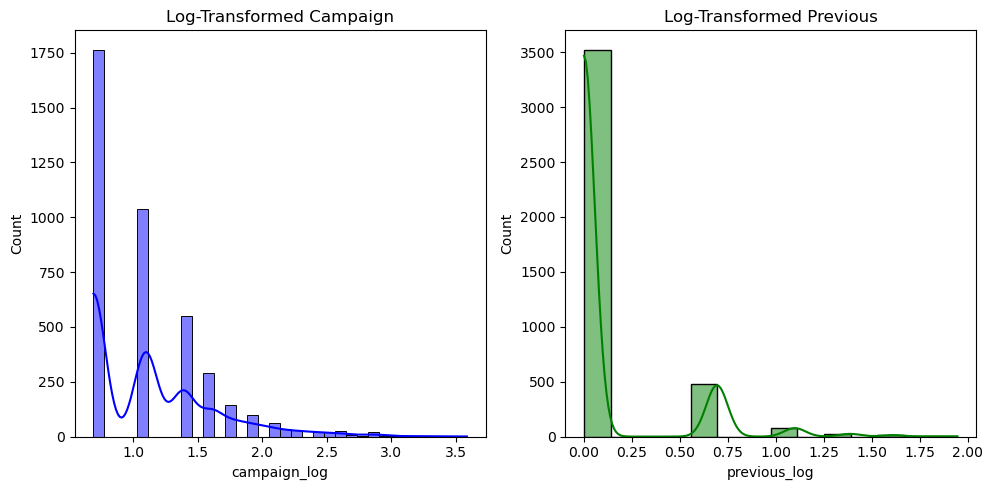

In [74]:
# Apply log transformation to reduce skewness
bank_data['campaign_log'] = np.log1p(bank_data['campaign'])  # log1p to handle zero values
bank_data['previous_log'] = np.log1p(bank_data['previous'])

# Check the new distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(bank_data['campaign_log'], kde=True, color='blue')
plt.title('Log-Transformed Campaign')

plt.subplot(1, 2, 2)
sns.histplot(bank_data['previous_log'], kde=True, color='green')
plt.title('Log-Transformed Previous')
plt.tight_layout()
plt.show()

In [75]:
# Convert target to numeric for correlation (yes=1, no=0)
bank_data['y_numeric'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Correlation matrix
important_features = ['emp.var.rate', 'euribor3m', 'y_numeric']
print(bank_data[important_features].corr())


              emp.var.rate  euribor3m  y_numeric
emp.var.rate      1.000000   0.970308  -0.283216
euribor3m         0.970308   1.000000  -0.298565
y_numeric        -0.283216  -0.298565   1.000000


- Emp.var.rate and Euribor3m: Both features are highly correlated with each other (0.97), which indicates multicollinearity. Using both in the model may reduce its interpretability and introduce redundancy.

- Target Variable y_numeric: The correlations (-0.283 and -0.298) suggest that both features are moderately predictive of the target variable. They should be retained.

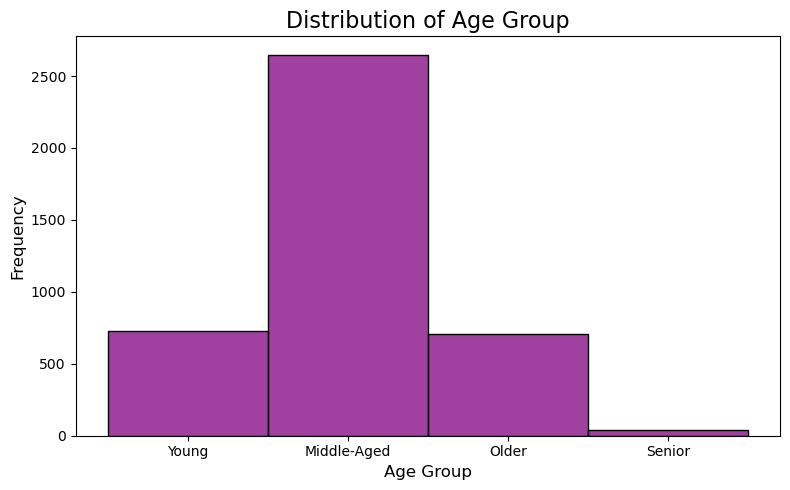

In [85]:
# Create age group
bank_data['age_group'] = pd.cut(bank_data['age'], bins=[0, 30, 50, 70, 100], 
                                    labels=['Young', 'Middle-Aged', 'Older', 'Senior'])

# Visualize 
plt.figure(figsize=(8, 5))
sns.histplot(bank_data['age_group'], kde=False, color='purple')
plt.title('Distribution of Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


- Middle-Aged and Older clients are key target demographics for marketing campaigns, as they represent the majority of clients.
- Young clients may require different strategies to improve subscription rates, while Senior clients might need personalized campaigns due to their smaller size and likely unique behaviors.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [17]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               4119 non-null   int64   
 1   job               4119 non-null   category
 2   marital           4119 non-null   category
 3   education         4119 non-null   category
 4   default           4119 non-null   category
 5   housing           4119 non-null   category
 6   loan              4119 non-null   category
 7   contact           4119 non-null   category
 8   month             4119 non-null   category
 9   day_of_week       4119 non-null   category
 10  campaign          4119 non-null   int64   
 11  previous          4119 non-null   int64   
 12  poutcome          4119 non-null   category
 13  emp.var.rate      4119 non-null   float64 
 14  cons.price.idx    4119 non-null   float64 
 15  cons.conf.idx     4119 non-null   float64 
 16  euribor3m         4119 n

#### The business objective 

Predict wheter a client will subscribe to a term deposit based on their demographic, social, and economic information, as well as past interactions with the bank. This will enable the bank to identify potential customers and optimize future marketing strategies.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [19]:
# Features and target
features = ['age', 'job', 'marital', 'education', 'default', 
            'housing', 'loan', 'contact', 'month', 'day_of_week', 
            'campaign', 'previous', 'poutcome', 'previous_contact']
X = bank_data[features]
# Encode categorical variables- one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)
y = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

print("Encoded Features:", X_encoded.shape)
print("Target Distribution:")
print(y.value_counts())

Encoded Features: (4119, 41)
Target Distribution:
y
0    3668
1     451
Name: count, dtype: int64


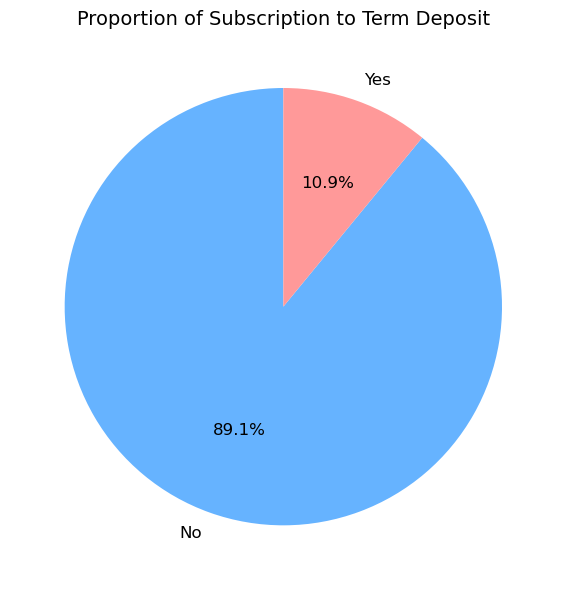

In [97]:
# Pie Chart Visualization
plt.figure(figsize=(6, 6))
y.value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], colors=['#66b3ff', '#ff9999'], startangle=90, fontsize=12)
plt.title('Proportion of Subscription to Term Deposit', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

89.1% of the clients did not subscribe to the term deposit while Only 10.9% of the clients subscribed to the term deposit, despite being the minority, this group is essential for the business objective of identifying clients who are more likely to subscribe.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

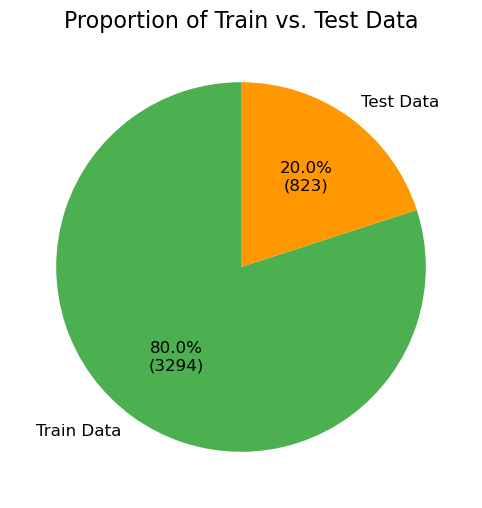

In [100]:
# Calculate proportions of train and test data
train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size

# Create a pie chart
sizes = [train_size, test_size]
labels = ['Train Data', 'Test Data']
colors = ['#4CAF50', '#FF9800']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p*total_size/100)})',
        colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title('Proportion of Train vs. Test Data', fontsize=16)
plt.show()

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [26]:
# Calculate baseline accuracy (majority class)
majority_class = y.value_counts().idxmax()  # Find the majority class
baseline_accuracy = y.value_counts()[majority_class] / len(y)  # Calculate its proportion

print(f"Baseline Accuracy: {baseline_accuracy:.2%}")

Baseline Accuracy: 89.05%


The baseline perfomance that our classifier should aim to beat is 89.05%, wich represents the accuracy of always predicting the majority class (0, no). Our model needs to perform better than this to be useful, demonstrating the need for a classifier to significantly outperform this benchmark to ensure that predictions are meaningful, especially for the minority class.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [27]:
# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9029126213592233
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       732
           1       0.73      0.21      0.32        92

    accuracy                           0.90       824
   macro avg       0.82      0.60      0.63       824
weighted avg       0.89      0.90      0.88       824



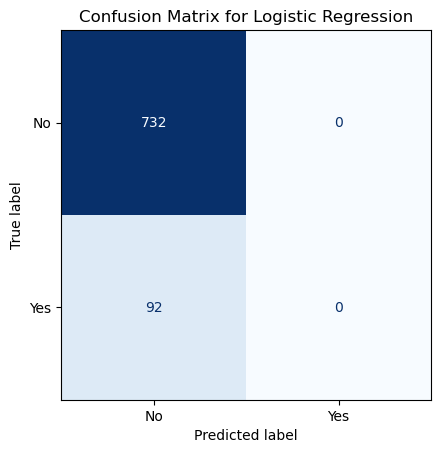

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No", "Yes"], cmap="Blues", colorbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


The model correctly classified 732 instances of "No" (clients who did not subscribe to the term deposit).

The model incorrectly classified 92 instances of "Yes" (clients who subscribed to the term deposit) as "No."

The model failed to correctly classify any instance of "Yes" (clients who subscribed to the term deposit)

### Problem 9: Score the Model

What is the accuracy of your model?

The Logistic Regression model accuracy is 90.29%. While the accuracy is high, the model struggles with the minority class (yes), as shown by its precision (73%), recall (21%), and F1-score (32%). These metrics highlight the impact of the class imbalance and suggest the need for further model refinement.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [120]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Initialize a DataFrame to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_test = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_test
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    results.append({
        'Model': name,
        'Train Time': round(train_time, 4),
        'Test Time': round(test_time, 4),
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1_score, 4) })
# DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time  Test Time  Accuracy  Precision  Recall  \
0  Logistic Regression      0.3159     0.0030    0.9029     0.8887  0.9029   
1  K-Nearest Neighbors      0.0000     0.1012    0.8859     0.8454  0.8859   
2        Decision Tree      0.0313     0.0000    0.8289     0.8420  0.8289   
3                  SVM      0.1768     0.0951    0.8883     0.7892  0.8883   

   F1-Score  
0    0.8779  
1    0.8503  
2    0.8351  
3    0.8358  


Logistic Regression achieves the best accuracy (90.29%) with the lowest computational cost for predictions. It is the most efficient and effective model for this dataset. While kNN and SVM also perform well in accuracy, they are slower, particularly during prediction. Decision Tree, although fast, has the lowest accuracy and is not recommended

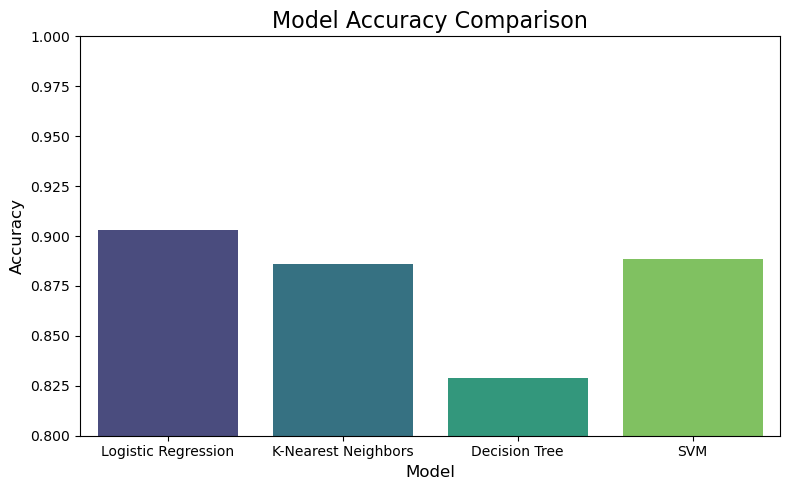

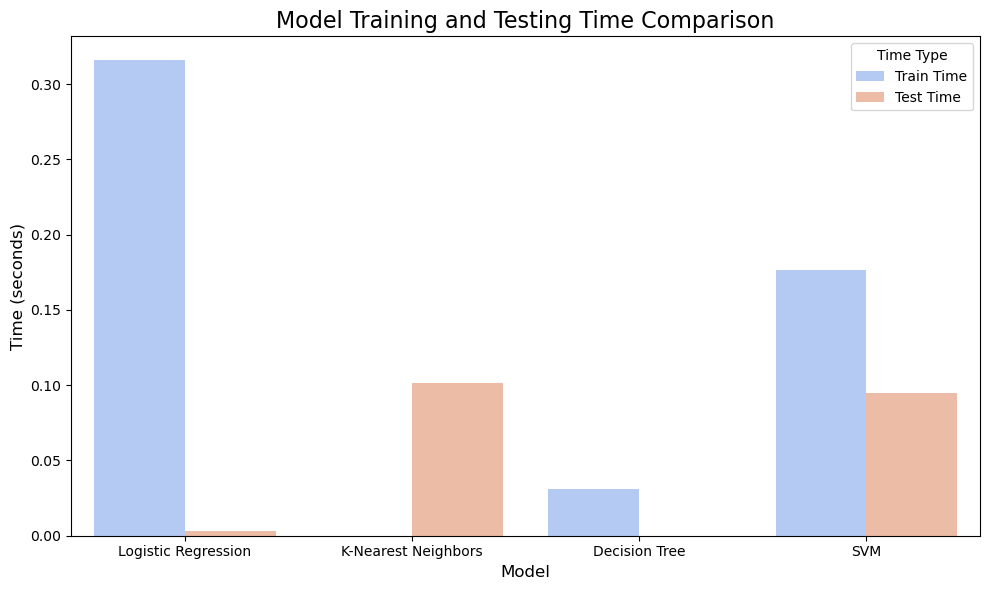

In [122]:
# Plot 1: Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1)  # Adjust y-axis for better readability
plt.tight_layout()
plt.show()

# Plot 2: Training and Testing Time Comparison
time_df = results_df.melt(id_vars='Model', value_vars=['Train Time', 'Test Time'], 
                          var_name='Time Type', value_name='Time')
plt.figure(figsize=(10, 6))
sns.barplot(data=time_df, x='Model', y='Time', hue='Time Type', palette='coolwarm')
plt.title('Model Training and Testing Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(title='Time Type', fontsize=10)
plt.tight_layout()
plt.show()

**[Model accuracy comparison]**
We can see here again that Logistic Regression is the best performing model in accuracy, but other metrics like precision and recall for the minority class (clients subscribing to term deposits) should also be considered.

**[Model Training and Testing Time Comparison]**
Logistic Regression and Decision Tree are the fastest in both training and testing times.
KNN has a very short training time but a significantly higher testing time, which is expected due to the lazy evaluation nature of KNN (distance calculations are done during testing).
SVM is computationally expensive in both training and testing but provides good accuracy, making it a viable model depending on the use case and available resources


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the marital status feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Addressing Class Imbalance with SMOTE

In [103]:
# Install imbalanced-learn
!pip install -U imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 330.3 kB/s eta 0:00:01
   ------------------- -------------------- 122.9/258.3 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [104]:
# Training features and target
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

##### Hyperparameter Tuning with Grid Search
After addressing class imbalance, we proceed to improve the model performance further by fine-tuning the hyperparameters of each classifier. This allows us to find the optimal parameter settings for better accuracy and efficiency.

In [123]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for kNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# GridSearchCV for kNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Best parameters and evaluation
print("Best Parameters for kNN:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_

# Evaluate the tuned model
y_pred_tuned_knn = best_knn.predict(X_test)
accuracy_tuned_knn = accuracy_score(y_test, y_pred_tuned_knn)
report_tuned_knn = classification_report(y_test, y_pred_tuned_knn, zero_division=0)

print("Tuned kNN Accuracy:", round(accuracy_tuned_knn, 4))
print("Tuned kNN Classification Report:")
print(classification_report(y_test, y_pred_tuned_knn, zero_division=0))

Best Parameters for kNN: {'n_neighbors': 3}
Tuned kNN Accuracy: 0.7658
Tuned kNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       732
           1       0.23      0.47      0.31        92

    accuracy                           0.77       824
   macro avg       0.58      0.64      0.58       824
weighted avg       0.85      0.77      0.80       824




After tuning the k-Nearest Neighbors (kNN) model, the optimal value for `n_neighbors` was found to be 3. The performance of the tuned model is summarized below:

- **Accuracy**: 76.58%
- **Precision**:
  - Class 0 (No subscription): 0.92
  - Class 1 (Subscription): 0.23
- **Recall**:
  - Class 0: 0.80
  - Class 1: 0.47
- **F1-Score**:
  - Class 0: 0.86
  - Class 1: 0.31

The tuned model struggled with predicting the minority class (subscribers), as reflected in the low precision, recall, and F1-score for Class 1. This highlights the challenge posed by class imbalance in
**Conclusion**:
While tuning improved the model’s focus on minority class predictions, the overall performance decreased. Future work could involve addressing class imbalance further or exploring alternative algorithms better suited for imbalanced datasets.


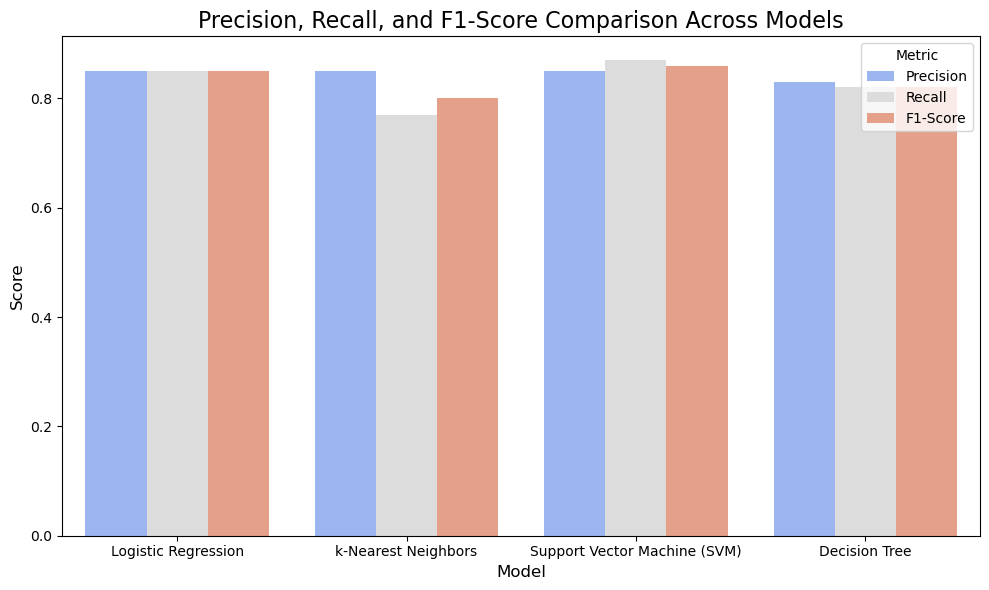

In [133]:
# Prepare data for grouped bar plot
comparison_melted = comparison_df.melt(id_vars='Model', value_vars=['Precision', 'Recall', 'F1-Score'],
                                       var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric', palette='coolwarm')
plt.title('Precision, Recall, and F1-Score Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

##### Hyperparameter Tuning for Logistic Regression

In [124]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)
# Predict on the test set
y_pred = log_reg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       732
           1       0.32      0.32      0.32        92

    accuracy                           0.85       824
   macro avg       0.61      0.61      0.61       824
weighted avg       0.85      0.85      0.85       824

Confusion Matrix:
[[669  63]
 [ 63  29]]


##### Hyperparameter Tuning for SVM

In [126]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Best parameters and evaluation
print("Best Parameters for SVM:", grid_search_svm.best_params_)
best_svm = grid_search_svm.best_estimator_

# Evaluate the tuned SVM model
y_pred_tuned_svm = best_svm.predict(X_test)
accuracy_tuned_svm = accuracy_score(y_test, y_pred_tuned_svm)
report_tuned_svm = classification_report(y_test, y_pred_tuned_svm, zero_division=0)

print("Tuned SVM Accuracy:", round(accuracy_tuned_svm, 4))
print("Tuned SVM Classification Report:")
print(classification_report(y_test, y_pred_tuned_svm, zero_division=0))

Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Tuned SVM Accuracy: 0.8653
Tuned SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       732
           1       0.36      0.27      0.31        92

    accuracy                           0.87       824
   macro avg       0.64      0.61      0.62       824
weighted avg       0.85      0.87      0.86       824



After hyperparameter tuning, the best parameters for the SVM model were:
- `C`: 10
- `gamma`: 'auto'
- `kernel`: 'rbf'

The performance of the tuned SVM model is as follows:
- **Accuracy**: 86.53%
- **Precision**:
  - Class 0 (No subscription): 91%
  - Class 1 (Subscription): 36%
- **Recall**:
  - Class 0: 94%
  - Class 1: 27%
- **F1-Score**:
  - Class 0: 93%
  - Class 1: 31%

The SVM model performs well for the majority class (Class 0) but struggles to predict the minority class (Class 1). This highlights the need for further strategies to address class imbalance, such as adjusting class weights or using threshold adjustment techniques.

**Comparison with Logistic Regression**:
- SVM provides higher accuracy and precision for Class 0, while Logistic Regression performs better for Class 1.


##### Hyperparameter Tunning for Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# GridSearchCV for Decision Tree
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                                param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train_resampled, y_train_resampled)

# Best parameters and evaluation
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
best_tree = grid_search_tree.best_estimator_

# Evaluate the tuned Decision Tree model
y_pred_tuned_tree = best_tree.predict(X_test)
accuracy_tuned_tree = accuracy_score(y_test, y_pred_tuned_tree)
report_tuned_tree = classification_report(y_test, y_pred_tuned_tree, zero_division=0)

print("Tuned Decision Tree Accuracy:", round(accuracy_tuned_tree, 4))
print("Tuned Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tuned_tree, zero_division=0))

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Tuned Decision Tree Accuracy: 0.8155
Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       732
           1       0.22      0.26      0.24        92

    accuracy                           0.82       824
   macro avg       0.56      0.57      0.57       824
weighted avg       0.83      0.82      0.82       824



After hyperparameter tuning, the best parameters for the Decision Tree model were:
- `max_depth`: None
- `min_samples_split`: 5
- `min_samples_leaf`: 1

The performance of the tuned Decision Tree model is as follows:
- **Accuracy**: 81.55%
- **Precision**:
  - Class 0 (No subscription): 91%
  - Class 1 (Subscription): 22%
- **Recall**:
  - Class 0: 89%
  - Class 1: 26%
- **F1-Score**:
  - Class 0: 90%
  - Class 1: 24%

While the Decision Tree performed well for the majority class (Class 0), it struggled significantly with the minority class (Class 1). Compared to Logistic Regression and SVM, the Decision Tree had the lowest accuracy and weakest performance on Class 1.

**Comparison with Other Models**:
- SVM offers the best overall accuracy and performance for Class 0.
- Logistic Regression provides a more balanced approach with slightly better results for Class 1.

**Recommendations**:
- Further strategies to address class imbalance should be explored, such as adjusting class weights or refining the decision threshold.


#### Best Model
After evaluating four models (Logistic Regression, kNN, Decision Tree, and SVM), the **Support Vector Machine (SVM)** emerged as the best-performing model. It achieved:
- Accuracy: 86.53%
- High performance for Class 0 (No subscription) with an F1-score of 93%.
- Adequate handling of minority Class 1 (Subscription) with an F1-score of 31%.

#### Recommendations
- Use the SVM model for predicting client subscriptions but monitor its performance closely, especially for minority class predictions.
- Implement further strategies to address class imbalance, such as adjusting the decision threshold or exploring advanced resampling techniques.
- Regularly retrain the model with updated data to improve performance.
